In [1]:
# Import package
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')

/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ohwadalab-mac/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Import dataset
df = pd.read_csv('./dairy-dry.csv',sep=',')

In [3]:
# Check dataset
df.head()

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
0,1482211717,38,-60,6.3,3.4,11.7,69,64,17,10.3,5.6,79,101,131.4,438.9
1,864141871,59,-49,7.4,3.7,11.7,68,68,21,10.4,6.1,76,137,68.8,381.0
2,1458511810,64,-47,6.1,3.8,11.1,48,58,21,10.0,6.6,73,119,141.2,413.9
3,1511310022,35,-45,7.4,3.4,9.3,82,62,24,10.6,5.6,73,134,101.1,490.4
4,1501270497,54,-43,6.4,3.5,10.2,60,62,20,10.6,5.6,70,109,393.0,292.0


In [4]:
# Make copy of dataset
df_tr = df

In [5]:
# Standardize
# Calculate the z score of each value in the sample, 
# relative to the sample mean and standard deviation.
clmns = ['TP','ALB','BUN','GOT', 'GGT', 'CA','IP','GLU','NH3', 'NEFA','BHB']
df_tr_std = stats.zscore(df_tr[clmns])

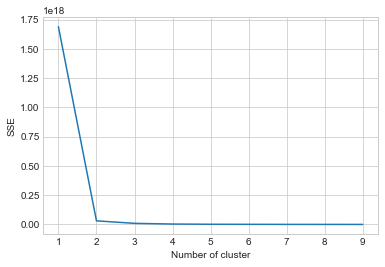

In [6]:
# Deciding how many cluster using Elbow Method
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_tr)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [7]:
# Check the Silhoutte Coefficient to confirm the number of cluster
# Generally, chooose n_cluster with highest score

from sklearn.metrics import silhouette_samples, silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_tr)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_tr, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9400680123836198
For n_clusters=3, The Silhouette Coefficient is 0.6904626995340878
For n_clusters=4, The Silhouette Coefficient is 0.6958776744845572
For n_clusters=5, The Silhouette Coefficient is 0.7390720708781716
For n_clusters=6, The Silhouette Coefficient is 0.7568923592732096
For n_clusters=7, The Silhouette Coefficient is 0.7497932531636321
For n_clusters=8, The Silhouette Coefficient is 0.803448012497663
For n_clusters=9, The Silhouette Coefficient is 0.7955866152946738
For n_clusters=10, The Silhouette Coefficient is 0.7867500024878341


In [8]:
# Implement k-means to standardized data 
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [9]:
# After cluster is formed, add new column defining their cluster
df_tr['clusters'] = labels
clmns.extend(['clusters'])

In [10]:
# Check result of clustering
df_tr

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB,clusters
0,1482211717,38,-60,6.3,3.4,11.7,69,64,17,10.3,5.6,79,101,131.4,438.9,1
1,864141871,59,-49,7.4,3.7,11.7,68,68,21,10.4,6.1,76,137,68.8,381.0,0
2,1458511810,64,-47,6.1,3.8,11.1,48,58,21,10.0,6.6,73,119,141.2,413.9,1
3,1511310022,35,-45,7.4,3.4,9.3,82,62,24,10.6,5.6,73,134,101.1,490.4,1
4,1501270497,54,-43,6.4,3.5,10.2,60,62,20,10.6,5.6,70,109,393.0,292.0,1
5,864142588,60,-42,6.4,3.3,13.1,49,62,20,10.2,8.2,74,140,111.0,394.0,1
6,864142632,57,-37,7.5,3.7,14.0,109,88,11,11.9,5.4,85,131,123.0,489.0,0
7,864207157,61,-37,6.4,3.5,13.5,65,53,20,10.7,4.6,72,127,157.0,419.0,1
8,1436725420,79,-35,6.4,3.5,12.9,66,54,22,10.5,7.4,68,127,122.5,446.8,1
9,1373724159,91,-34,7.3,3.9,12.5,78,72,19,11.4,3.3,81,149,112.0,501.0,0


In [11]:
# If needed, save clustering result
# df_tr.to_csv('./cluster-dairy-dry.csv')

In [12]:
# Calculate mean of each cluster
mean = df_tr[clmns].groupby(['clusters']).mean()
mean

,TP,ALB,BUN,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
clusters,,,,,,,,,,,
0,7.2,3.780000,12.600000,73.000000,17.60000,11.140000,5.040000,80.800000,135.20000,112.720000,472.720000
1,6.4,3.504762,11.128571,64.952381,19.52381,10.357143,5.995238,70.761905,116.52381,164.404762,464.604762


In [13]:
# If needed, save mean result
# mean.to_csv('./meanbefore.csv')

In [14]:
# Calculate standard deviation of each cluster
std = df_tr[clmns].groupby(['clusters']).std()
std

,TP,ALB,BUN,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB
clusters,,,,,,,,,,,
0,0.282843,0.083666,0.891628,8.717798,4.560702,0.698570,1.099091,4.266146,8.671793,30.769660,55.054446
1,0.378153,0.132198,1.298901,11.101694,3.970127,0.211119,0.887962,3.604230,12.940707,81.161977,72.553583


In [15]:
# If needed, save stdev result
# std.to_csv('./std1.csv')

Text(23.72127604166667, 0.5, 'IP')

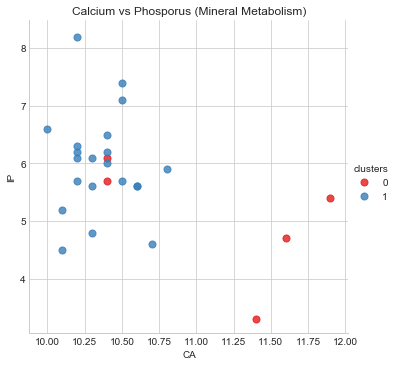

In [16]:
# Plot 1: Relationship between Calcium and Phosphorus within each cluster

ax = sns.lmplot('CA', 'IP', 
          data=df_tr, 
         fit_reg=False, 
        hue="clusters",  palette="Set1",
       scatter_kws={"marker": "D", 
                   "s": 50})

plt.title('Calcium vs Phosporus (Mineral Metabolism)')
plt.xlabel('CA')
plt.ylabel('IP')


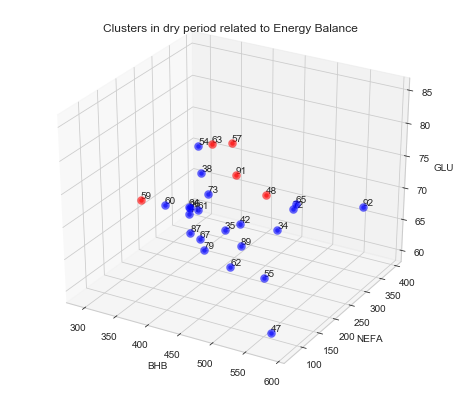

In [17]:
# Plot 2: 3D - plot between NEFA, GLU, and BHB within each cluster

import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['BHB'], df_tr.iloc[i]['NEFA'], df_tr.iloc[i]['GLU']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4, label = 'clusters')
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),va='bottom', size=10)
 
    
ax1.set_xlabel('BHB')
ax1.set_ylabel('NEFA')
ax1.set_zlabel('GLU')

plt.title('Clusters in dry period related to Energy Balance')    
plt.show()

# For view from different angle
#for angle in range(0, 360):
#    ax1.view_init(10, angle)
#    plt.draw()
#    plt.pause(.001)

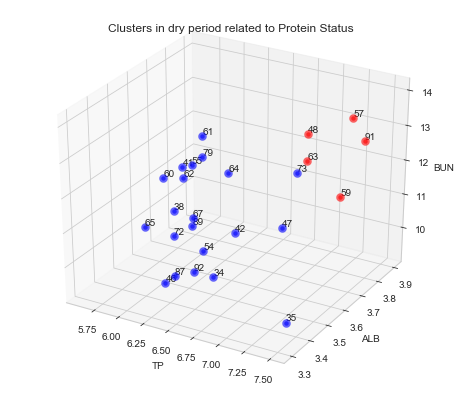

In [18]:
# Plot 3: 3D - plot between Total Protein, ALB, and BUN within each cluster

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['TP'], df_tr.iloc[i]['ALB'], df_tr.iloc[i]['BUN']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4)
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),va='bottom', size=10)
 
    
ax1.set_xlabel('TP')
ax1.set_ylabel('ALB')
ax1.set_zlabel('BUN')

plt.title('Clusters in dry period related to Protein Status')   
plt.show()

# For view from different angle
#for angle in range(0, 360):
#       ax1.view_init(10, angle)
#       plt.draw()
#       plt.pause(.001)

Text(0.5, 0.92, 'Clusters in dry period related to Liver Condition')

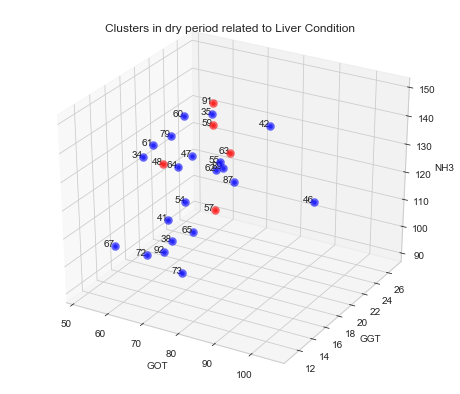

In [19]:
# Plot 4: 3D - plot between GOT, GGT, and NH3 within each cluster
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
mpl.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 7))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['red', 'blue', 'green']
for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['GOT'], df_tr.iloc[i]['GGT'], df_tr.iloc[i]['NH3']
    ax1.scatter(x, y, z, c=colors[int(df_tr.iloc[i]['clusters'])], alpha = 0.6, linewidths=4)
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['cowid'].astype(int)),ha='right', size=10)
    
    
ax1.set_xlabel('GOT')
ax1.set_ylabel('GGT')
ax1.set_zlabel('NH3')


plt.title('Clusters in dry period related to Liver Condition')      
#plt.show()

# For view from different angle
#for angle in range(0, 360):
#       ax1.view_init(10, angle)
#       plt.draw()
#       plt.pause(.001)

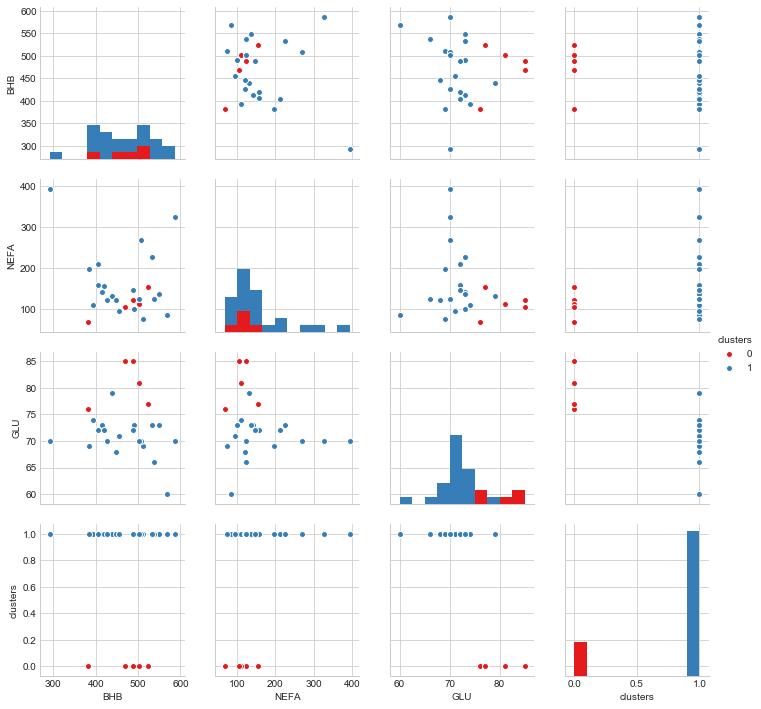

In [20]:
# Pair plot to see relationship between 2 metabolites
energy = df_tr[['BHB', 'NEFA', 'GLU','clusters']]

sns.pairplot(energy, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o"], palette="Set1")
plt.show()


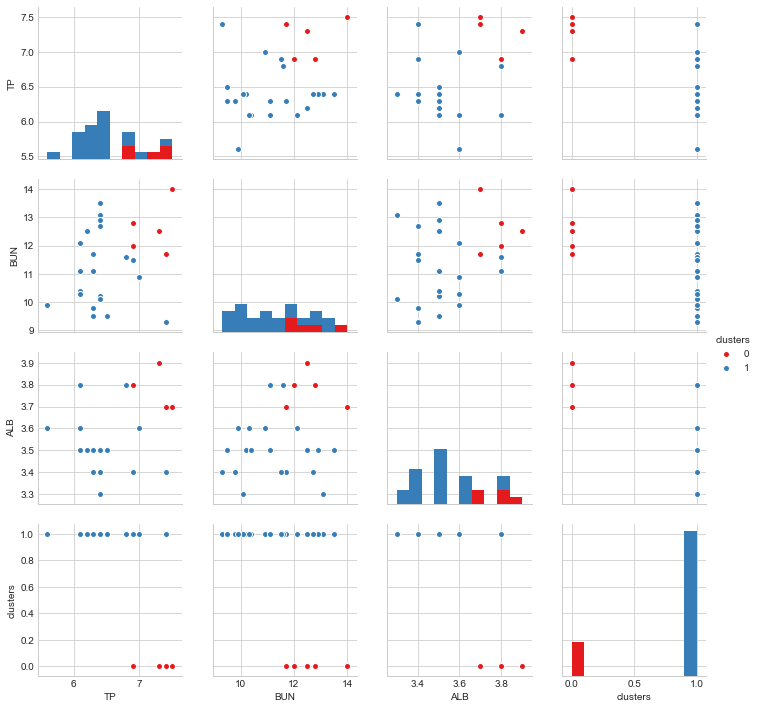

In [21]:
pro = df_tr[['TP', 'BUN', 'ALB','clusters']]

sns.pairplot(pro, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o"], palette="Set1")
plt.show()


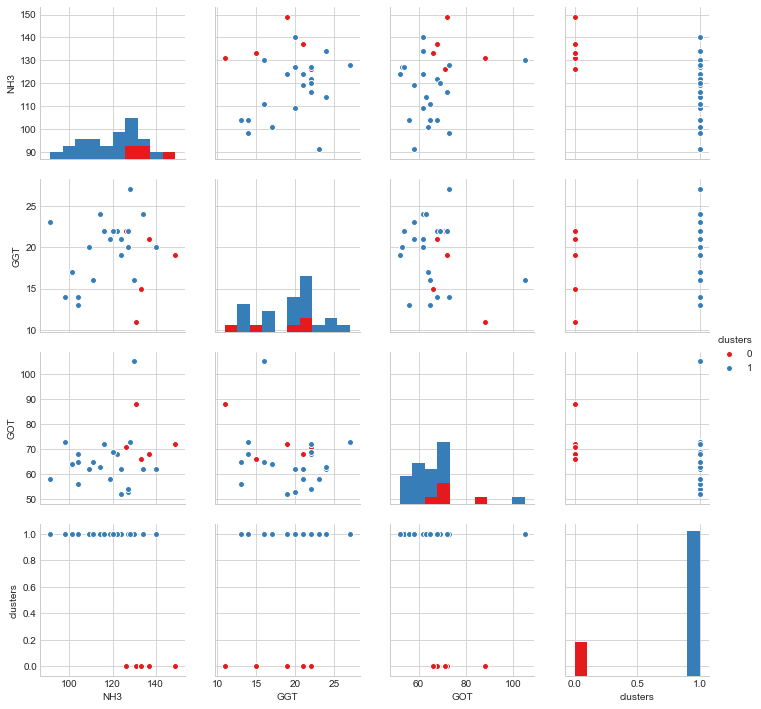

In [22]:
liver = df_tr[['NH3', 'GGT', 'GOT','clusters']]

sns.pairplot(liver, kind="scatter",  diag_kind="hist", hue="clusters", markers=["o", "o"], palette="Set1")
plt.show()


In [23]:
df_tr

,global,cowid,days,TP,ALB,BUN,CHO,GOT,GGT,CA,IP,GLU,NH3,NEFA,BHB,clusters
0,1482211717,38,-60,6.3,3.4,11.7,69,64,17,10.3,5.6,79,101,131.4,438.9,1
1,864141871,59,-49,7.4,3.7,11.7,68,68,21,10.4,6.1,76,137,68.8,381.0,0
2,1458511810,64,-47,6.1,3.8,11.1,48,58,21,10.0,6.6,73,119,141.2,413.9,1
3,1511310022,35,-45,7.4,3.4,9.3,82,62,24,10.6,5.6,73,134,101.1,490.4,1
4,1501270497,54,-43,6.4,3.5,10.2,60,62,20,10.6,5.6,70,109,393.0,292.0,1
5,864142588,60,-42,6.4,3.3,13.1,49,62,20,10.2,8.2,74,140,111.0,394.0,1
6,864142632,57,-37,7.5,3.7,14.0,109,88,11,11.9,5.4,85,131,123.0,489.0,0
7,864207157,61,-37,6.4,3.5,13.5,65,53,20,10.7,4.6,72,127,157.0,419.0,1
8,1436725420,79,-35,6.4,3.5,12.9,66,54,22,10.5,7.4,68,127,122.5,446.8,1
9,1373724159,91,-34,7.3,3.9,12.5,78,72,19,11.4,3.3,81,149,112.0,501.0,0


In [24]:
# Sort the dataframe by clusters
df_tr = df.sort_values(by="clusters")

In [25]:
def color_protein(value):
    if value < 6:
        color = 'red'
    elif 6.8 < value or value > 8.5:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [26]:
def color_alb(value):
    if value < 3:
        color = 'red'
    elif value > 3.7:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [27]:
def color_bun(value):
    if value < 13:
        color = 'red'
    elif value > 17:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [28]:
def color_nefa(value):
    if value > 700:
        color = 'red'
    elif value < 300:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [29]:
def color_glu(value):
    if value < 42:
        color = 'red'
    elif value > 74:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [30]:
def color_ggt(value):
    if value > 27:
        color = 'red'
    elif  value < 15 or value > 19:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [31]:
def color_ca(value):
    if value < 8:
        color = 'red'
    elif value > 11:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [32]:
def color_ip(value):
    if value < 3.5:
        color = 'red'
    elif value > 8:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [33]:
def color_bhb(value):
    if value > 960:
        color = 'red'
    elif value < 120:
        color = 'green'
    else:
        color = 'black'

    return 'color: %s' % color

In [34]:
def color_got(value):
    if value > 100:
        color = 'red'
    else:
        color = 'black'

    return 'color: %s' % color

In [35]:
new_df = df_tr.drop(columns=['CHO'])    

In [36]:
# Map individual data based on metabolites score limit

new_df.style.\
    applymap(color_protein, subset=['TP']).\
    applymap(color_alb, subset=['ALB']).\
    applymap(color_nefa, subset=['NEFA']).\
    applymap(color_ggt, subset=['GGT']).\
    applymap(color_ca, subset=['CA']).\
    applymap(color_ip, subset=['IP']).\
    applymap(color_glu, subset=['GLU']).\
    applymap(color_bhb, subset=['BHB']).\
    applymap(color_got, subset=['GOT']).\
    applymap(color_bun, subset=['BUN']).\
    to_excel('dairydry.xlsx', engine='openpyxl') #File save to excel 

In [46]:
def main():
    pro = df_tr["global"][(df_tr["TP"] < 6) | (df_tr["BUN"] < 13) | (df_tr["ALB"] < 3)].tolist()
    eb = df_tr["global"][(df_tr["NEFA"] > 700)| (df_tr["GLU"] < 42) | (df_tr["BHB"] > 960) ].tolist()
    liver = df_tr["global"][(df_tr["GOT"] > 100) | (df_tr["GGT"] > 27)].tolist()
    caip = df_tr["global"][(df_tr["CA"] < 8) | (df_tr["IP"] < 3.5)].tolist()
    
    
    print("Cow ID that need monitoring of protein status:", pro)
    print("Cow ID who needs monitoring of energy balance / stress:", eb)
    print("Cow ID that need monitoring of liver status:", liver)
    print("Cow ID that need monitoring of Calcium/Phosphorus status:", caip)
    
if __name__ == "__main__":
    main()

Cow ID that need monitoring of protein status: [864141871, 864142540, 1373724159, 1514410118, 1482211717, 1396615953, 1483811640, 1466606560, 1461212865, 864770057, 1501556256, 1465611121, 1512209752, 1477034833, 1436725352, 1437612545, 1494659514, 1436725420, 1501270497, 1511310022, 1458511810, 1401416254, 1460912186]
Cow ID who needs monitoring of energy balance / stress: []
Cow ID that need monitoring of liver status: [1437612545]
Cow ID that need monitoring of Calcium/Phosphorus status: [1373724159]
